In [1]:
from __future__ import absolute_import , print_function
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import warnings
warnings.filterwarnings('ignore')

In [2]:
import tensorflow as tf

In [3]:
# MNSIT data set
num_clases = 10 # we have output clases from 0 to 9
num_features = 784 # as image is 28 X 28 px
ita = 0.001 #this is the learning rate for our model
training_step = 3000 # it is the itteration
batch_size = 256 # for each training step we will pick 256 images --> total no of batches is 6000/256
display_step = 100 # after how much step we want print the data/info to user like ( accuracy , loss , precision etc etc)

# neural network
n_hidden_1 = 128 #number of neuron in 1st layer
n_hidden_2 = 256 #number of neuron in 2nd layer


In [4]:
# lets prepare the mnsit data

from tensorflow.keras.datasets import mnist

(X_train , y_train),( X_test,y_test ) = mnist.load_data()

In [5]:
X_train[1,:]

array([[  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,  51, 159, 253, 159,  50,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,  48, 238, 252, 252, 252, 237,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
         54, 227, 253, 252, 239, 233, 252,  57,   6,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,  10,  60,
        224, 252, 253, 252, 202,  84, 252, 253, 122,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0, 163, 252,
        252, 252, 253, 252, 252,  96, 189, 253, 167,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,  51, 238, 253,
        253, 190, 114, 253, 228,  47,  79, 255, 168,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,  48, 238, 252, 252,
        179,  12,  75, 121,  21,   0,   0, 253, 243,  50,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,  38, 165, 253, 233, 208,
         84,   0,   0,   0,   0,   0,   0, 253, 252, 165,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   7, 178, 252, 240,  71,  19,
         28,   0,   0,   0,   0,   0,   0, 253, 252, 195,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,  57, 252, 252,  63,   0,   0,
          0,   0,   0,   0,   0,   0,   0, 253, 252, 195,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0, 198, 253, 190,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0, 255, 253, 196,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,  76, 246, 252, 112,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0, 253, 252, 148,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,  85, 252, 230,  25,   0,   0,   0,
          0,   0,   0,   0,   0,   7, 135, 253, 186,  12,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,  85, 252, 223,   0,   0,   0,   0,
          0,   0,   0,   0,   7, 131, 252, 225,  71,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,  85, 252, 145,   0,   0,   0,   0,
          0,   0,   0,  48, 165, 252, 173,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,  86, 253, 225,   0,   0,   0,   0,
          0,   0, 114, 238, 253, 162,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,  85, 252, 249, 146,  48,  29,  85,
        178, 225, 253, 223, 167,  56,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,  85, 252, 252, 252, 229, 215, 252,
        252, 252, 196, 130,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,  28, 199, 252, 252, 253, 252, 252,
        233, 145,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,  25, 128, 252, 253, 252, 141,
         37,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   

In [6]:
# converting the training dataset to float
X_train , X_test = np.array(X_train , np.float32) , np.array(X_test , np.float32)

In [7]:
# flattening the image to one-d vector of 738 features ( 28 * 28 )
X_train , X_test = X_train.reshape([-1 , num_features]) , X_test.reshape([-1,num_features])

In [8]:
#normalizing our data from [0-255] to [0-1]
X_train = np.divide(X_train , 255.0)
X_test = np.divide(X_test , 255.0)

In [9]:
# tf.data -> used to shuffle data and batch them
train_data = tf.data.Dataset.from_tensor_slices((X_train,y_train))
train_data = train_data.repeat().shuffle(5000).batch(batch_size).prefetch(1)

In [10]:
# initially declaring random number for the layer weights and bias
random_number = tf.initializers.RandomNormal()

weights = {
    'wh1' : tf.Variable(random_number([num_features , n_hidden_1])) ,
    'wh2': tf.Variable(random_number([n_hidden_1 , n_hidden_2])),
    'out' : tf.Variable(random_number([n_hidden_2 , num_clases]))
}
bias  = {
    'b1' : tf.Variable(random_number([n_hidden_1])),
    'b2' : tf.Variable(random_number([n_hidden_2])),
    'out' : tf.Variable(random_number([num_clases]))
}

In [11]:
weights['wh1'].shape ,weights['wh2'].shape ,weights['out'].shape

(TensorShape([784, 128]), TensorShape([128, 256]), TensorShape([256, 10]))

In [12]:
# creating model

def neural_network(x):
  # fully connected 1st hidden layer with 128 neuron
  l1 = tf.add(tf.matmul(x,weights['wh1']),bias['b1'])
  # applying sigmoid fun l1 for non-linearity
  a1 = tf.nn.sigmoid(l1)

  # fully connected 2nd hidden layer with 256 neuron
  l2 = tf.add(tf.matmul(a1,weights['wh2']),bias['b2'])
  # applying sigmoid fun l1 for non-linearity
  a2 = tf.nn.sigmoid(l2)

  # fully connected output layer with 10 neurons
  out = tf.add(tf.matmul(a2,weights['out']),bias['out'])
  # using softmax activation fun aa in output we have multi class classification
  final_output = tf.nn.softmax(out)

  return final_output

In [13]:
# using cross entropy loss function
def cross_entropy_loss_fun(y_pred , y_true):
  # doing onehotencoding of y_pred
  y_true = tf.one_hot(y_true,depth=num_clases)

  # clip pridiction values as logg loss fun have log in the formulae .. and log(0)can raise error
  y_pred = tf.clip_by_value(y_pred,1e-9,1.)

  # lets compute loss entropy
  return tf.reduce_mean(-tf.reduce_sum(y_true * tf.math.log(y_pred)))

In [14]:
#  defining accuracy metrices
def accuracy(y_pred , y_true):
  # finding the index of highest value in the y_pred vector as in soft max the higest prob is the final ans
  ans = tf.equal(tf.argmax(y_pred,1) ,tf.cast(y_true,tf.int64))
  acc = tf.reduce_mean(tf.cast(ans , tf.float32),axis=-1)
  return acc

In [15]:
#  lets define the optimizer
optimizer = tf.optimizers.SGD(ita)

In [16]:
def run_optimization(x,y):
  # wrap computation inside gradient tape for automatic differentation

  with tf.GradientTape() as g:
    y_pred = neural_network(x)
    loss = cross_entropy_loss_fun(y_pred , y)
  # variables to train while training -> backward propagation
  trainable_variables = list(weights.values()) + list(bias.values())
  # computing gradients
  gradients = g.gradient(loss,trainable_variables)

  # update w,b
  optimizer.apply_gradients(zip(gradients,trainable_variables))

In [17]:
# run training steps
loss_history = []
acc_history = []
for step , (X_train,y_train) in enumerate(train_data.take(training_step),1):
  # run the optimization
  run_optimization(X_train,y_train)

  if step % display_step == 0:
    y_pred = neural_network(X_train)
    loss = cross_entropy_loss_fun(y_pred,y_train)
    acc = accuracy(y_pred,y_train)
    print(f"after {step} step loss is {loss:.3f} and accuraccy is {(acc*100):.3f}")
    loss_history.append(loss)
    acc_history.append(acc)

after 100 step loss is 570.725 and accuraccy is 26.172
after 200 step loss is 405.162 and accuraccy is 46.484
after 300 step loss is 245.416 and accuraccy is 67.578
after 400 step loss is 172.165 and accuraccy is 79.688
after 500 step loss is 139.123 and accuraccy is 85.938
after 600 step loss is 120.146 and accuraccy is 83.984
after 700 step loss is 98.375 and accuraccy is 91.406
after 800 step loss is 85.626 and accuraccy is 92.969
after 900 step loss is 84.983 and accuraccy is 91.406
after 1000 step loss is 90.659 and accuraccy is 92.188
after 1100 step loss is 83.666 and accuraccy is 92.188
after 1200 step loss is 67.929 and accuraccy is 92.188
after 1300 step loss is 61.742 and accuraccy is 93.750
after 1400 step loss is 75.971 and accuraccy is 91.797
after 1500 step loss is 60.793 and accuraccy is 93.750
after 1600 step loss is 74.280 and accuraccy is 91.797
after 1700 step loss is 73.917 and accuraccy is 91.406
after 1800 step loss is 64.295 and accuraccy is 91.016
after 1900 st

In [18]:
# testing model on test data
y_pred_test = neural_network(X_test)
print(f"accuracy on test data is {(accuracy(y_pred_test,y_test)*100):.3f}")

accuracy on test data is 93.440


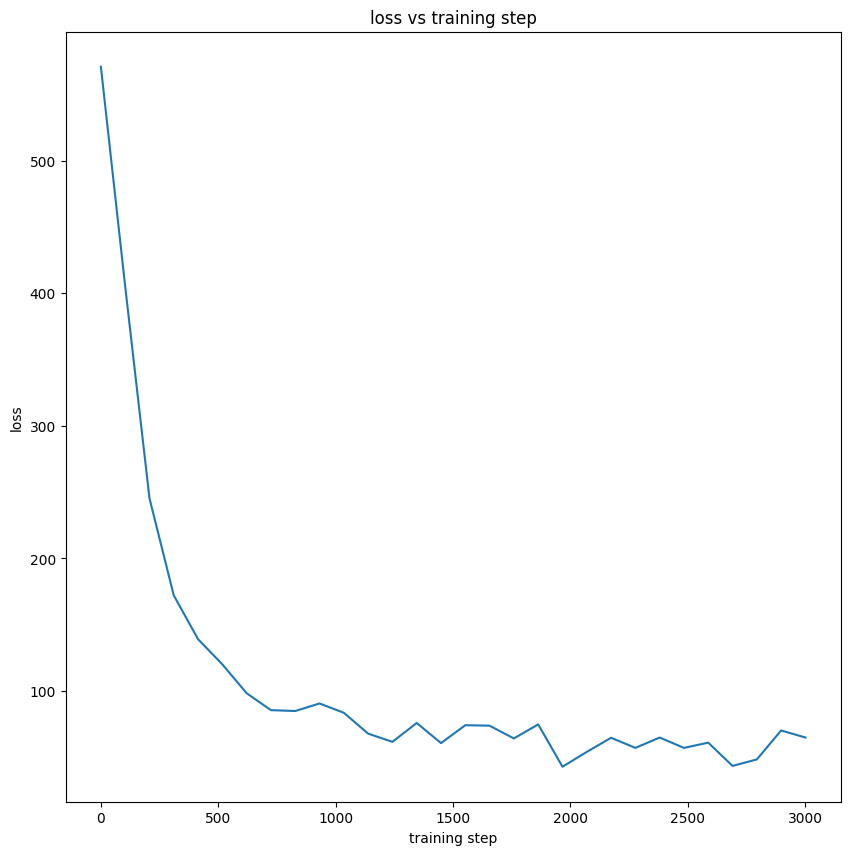

In [37]:
plt.figure(figsize = (10,10))
plt.plot(np.linspace(1,training_step,len(acc_history)),loss_history)
plt.xlabel("training step")
plt.ylabel("loss")
plt.title("loss vs training step")
plt.show()

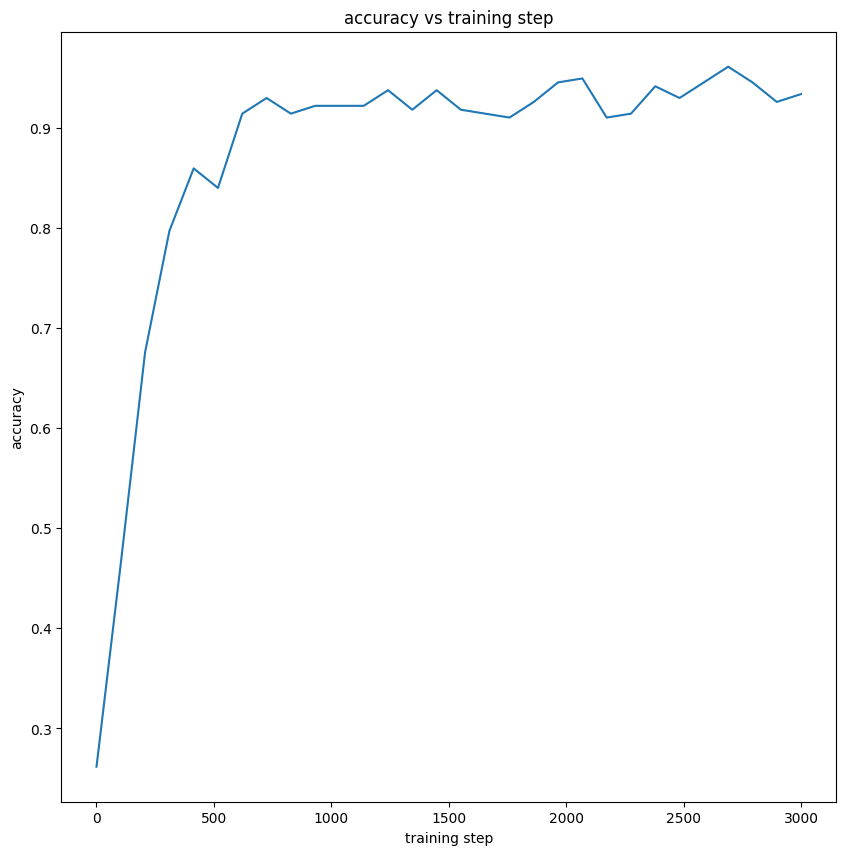

In [38]:
plt.figure(figsize = (10,10))
plt.plot(np.linspace(1,training_step,len(acc_history)),acc_history)
plt.xlabel("training step")
plt.ylabel("accuracy")
plt.title("accuracy vs training step")
plt.show()

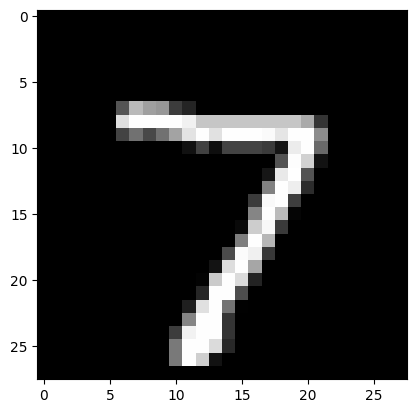

Model prediction 7


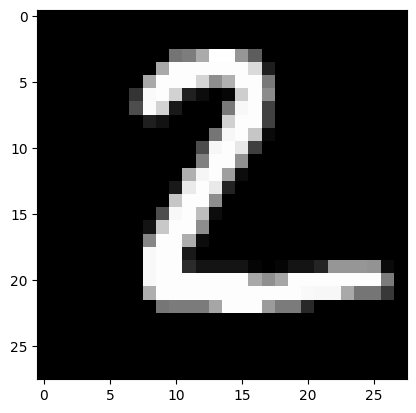

Model prediction 2


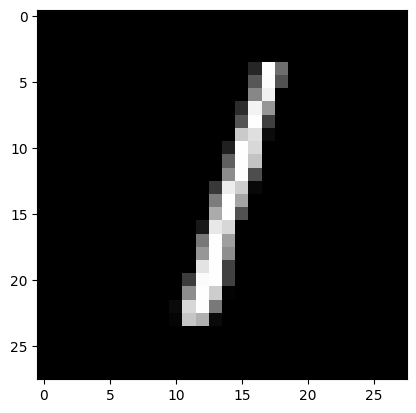

Model prediction 1


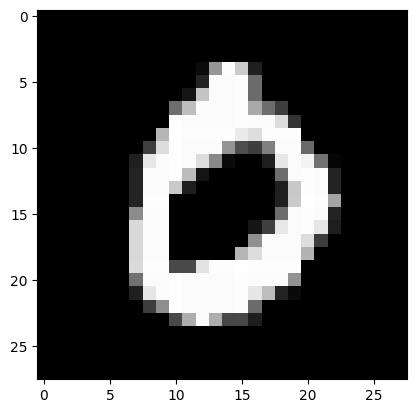

Model prediction 0


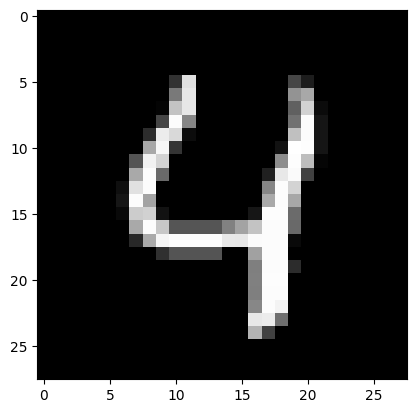

Model prediction 4


In [42]:
n_images = 5

test_images = X_test[:n_images]
# Shape = [5, 784]

predictions = neural_network(test_images)
# [5, 10 ]

for i in range(n_images):
  plt.imshow(np.reshape(test_images[i], [28, 28]), cmap = 'grey')
  plt.show()
  print(f"Model prediction {np.argmax(predictions.numpy()[i])}")